In [2]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
datasets=["cnn_reduced+pylidc_features.csv", "2valores.csv", "3valores.csv"]
df=[pd.read_csv(dataset) for dataset in datasets]

In [ ]:
df1=df[2]
df[2].head(5)


,PatientID,Label,Calcification,Lobulation,Spiculation,Internal Texture,Diameter (mm),Surface Area (mm^2),Volume (mm^3),Pixeis_in_lesion,...,cnn_feature 191,cnn_feature 192,cnn_feature 193,cnn_feature 194,cnn_feature 195,cnn_feature 196,cnn_feature 197,cnn_feature 198,cnn_feature 199,Label.1
0,LIDC-IDRI-0001,5,6,3,4,5,32.755812,2491.466573,6989.673615,5428,...,0.103554,-0.673255,0.911037,0.195182,1.503029,2.497326,-1.285972,-0.113949,-0.123039,5
1,LIDC-IDRI-0002,5,6,1,1,2,30.781671,2807.198994,7244.667508,14252,...,-0.465596,0.751876,-1.025916,-0.876682,-0.427128,-1.996738,2.039433,-0.173065,3.660489,4
2,LIDC-IDRI-0003,1,6,1,1,1,31.664468,1996.252117,4731.410934,2542,...,2.096471,1.056720,0.507382,1.195086,-1.089219,0.402015,-1.525909,-0.753988,2.830438,2
3,LIDC-IDRI-0003,5,6,2,3,4,31.001964,2225.677350,6519.463698,3241,...,1.189942,-0.748756,3.139558,1.495741,1.706667,-0.051177,-1.470173,-0.269185,-0.570582,4
4,LIDC-IDRI-0003,3,6,2,2,5,13.309155,321.183599,472.089669,261,...,0.260855,-1.168901,2.171054,-1.587639,0.945781,0.030748,-0.701231,-2.497634,-0.823811,3


In [5]:
#to keep the nodules from the same patient in the same group either train or test, we do this:
from sklearn.model_selection import GroupShuffleSplit 

splitter = GroupShuffleSplit(test_size=0.2, n_splits=2, random_state = 42)
split = splitter.split(df1, groups=df1['PatientID'])
train_inds, test_inds = next(split)

train = df1.iloc[train_inds]
test = df1.iloc[test_inds]

In [6]:
#seperate the class from the features
testy=test["Label"]
testx=test.drop(["Label","PatientID"],axis=1)
trainy=train["Label"]
trainx=train.drop(["Label","PatientID"],axis=1)

In [7]:
trainy.head(5)

0    5
1    5
2    1
3    5
4    3
Name: Label, dtype: int64

In [ ]:
#Using CV to tune the parameters but with the n_estimators fixed at 1000

param_dist = {'max_depth': randint(5,50),
              'min_samples_split': randint(2,10)}

rf = RandomForestClassifier(n_estimators=1000,random_state=42)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=50, 
                                 cv=5,
                                 n_jobs=-1,
                                 random_state=42)

# Fit the random search object to the data
rand_search.fit(trainx, trainy)
print("Best parameters:", rand_search.best_params_)
print("Best cross_validation_score:", rand_search.best_score_)

Best parameters: {'max_depth': 33, 'min_samples_split': 8}
Best cross_validation_score: 0.9464656650196632


In [31]:
rft = RandomForestClassifier(n_estimators=1000, max_depth=33, min_samples_split=8,random_state=42) 
rft.fit(trainx, trainy)

RandomForestClassifier(max_depth=33, min_samples_split=8, n_estimators=1000,
                       random_state=42)

In [47]:
predy=rft.predict(testx)
print(accuracy_score(testy,predy))
print(recall_score(testy,predy,average="macro"))
print(precision_score(testy,predy,average="weighted"))

0.9669260700389105
0.9445893656797529
0.9667885590116417


In [48]:
np.unique(trainy)
#1 significa benigno, 3 incerto, 5 maligno

array([1, 3, 5])

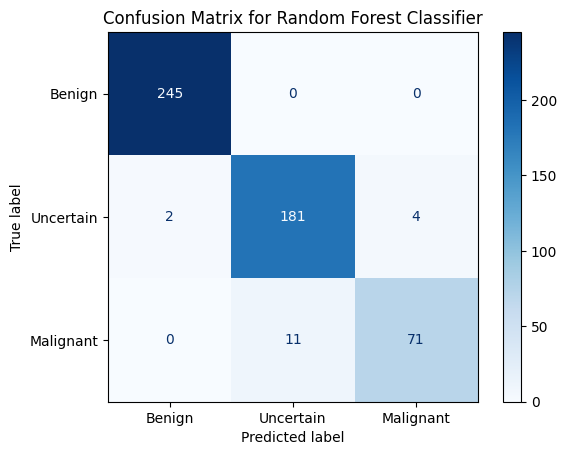

In [49]:
import matplotlib.pyplot as plt
cm = confusion_matrix(testy, predy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign","Uncertain","Malignant"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [158]:
df2=df[0]
df3=df[1]
new_dataset="pylidc_features_nl.csv"
df4=pd.read_csv(new_dataset)

In [159]:
splitter = GroupShuffleSplit(test_size=0.2, n_splits=2, random_state = 42)
split = splitter.split(df4, groups=df4['PatientID'])
train_inds, test_inds = next(split)
train = df4.iloc[train_inds]
test = df4.iloc[test_inds]

In [160]:
testy2=test["Label"]
testx2=test.drop(["Label","PatientID"],axis=1)
trainy2=train["Label"]
trainx2=train.drop(["Label","PatientID"],axis=1)

In [161]:
trainy2.head(5)

0    5
1    5
2    1
3    5
4    3
Name: Label, dtype: int64

In [162]:
rft2 = RandomForestClassifier(n_estimators=1000, max_depth=33, min_samples_split=8,random_state=42) 
rft2.fit(trainx2, trainy2)

RandomForestClassifier(max_depth=33, min_samples_split=8, n_estimators=1000,
                       random_state=42)

In [ ]:
predy2=rft2.predict(testx2)
print(accuracy_score(testy2,predy2))
60
59
62
63

0.6303501945525292


62

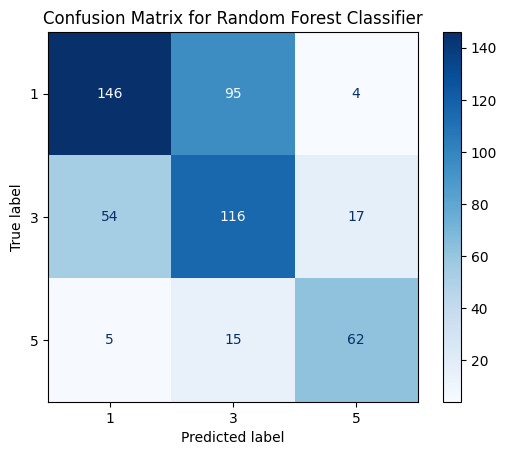

In [164]:
cm = confusion_matrix(testy2, predy2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1","3","5"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()